In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import base64

tqdm.pandas()
from wekeypedia import WikipediaPage as Page

In [2]:
name = 'Elke Mackenzie'
dead_name = 'SXZhbg=='
page_name = 'Ivan_Mackenzie_Lamb'
co_date = None

In [3]:
# Parameters
name = "Jennell Jaquays"
dead_name = "UGF1bCBKYXF1YXlz"
page_name = "Jennell_Jaquays"
co_date = "2021-03-04"


In [4]:
def format_revid_index(revid, page):
    return f'<a href="https://fr.wikipedia.org/w/index.php?title={page}&diff=prev&oldid={revid}">{revid}</a>'

# qui sont personnes qui énoncent le deadname dans l'article ?

## article

In [5]:
page = Page(page_name, lang='fr')

In [6]:
revisions = (
    pd
    .DataFrame
    .from_records(page.get_revisions())
    .set_index('revid')
)

revisions

,parentid,user,userid,timestamp,size,sha1,contentformat,contentmodel,comment,*,anon
revid,,,,,,,,,,,
213143912,213143881,Skouratov,926212,2024-03-07T18:21:02Z,26666,4640478c72a1d9b804143ace578689ffd0c735d0,text/x-wiki,wikitext,/* The Dungeoneer et les jeux de rôle fantasti...,{{Infobox Biographie2\n | charte = ...,NaN
213143881,213143869,Skouratov,926212,2024-03-07T18:20:09Z,26666,11af4b74f22b205943a9bc697da30f93d5c652af,text/x-wiki,wikitext,"/* Judges Guild, projets de jeux de rôle indép...",{{Infobox Biographie2\n | charte = ...,NaN
213143869,213143855,Skouratov,926212,2024-03-07T18:19:43Z,26663,3eedcd66bb98458ab21c32da3d02a36ee1ce0323,text/x-wiki,wikitext,/* The Dungeoneer et les jeux de rôle fantasti...,{{Infobox Biographie2\n | charte = ...,NaN
213143855,213141826,Skouratov,926212,2024-03-07T18:18:45Z,26660,db2907b5c8b17221db7a40c620c2d1d2f682c950,text/x-wiki,wikitext,/* The Dungeoneer et les jeux de rôle fantasti...,{{Infobox Biographie2\n | charte = ...,NaN
213141826,213037363,Skouratov,926212,2024-03-07T16:53:46Z,26657,103ae0b6537ecde00e79c206441bc07711b6cea6,text/x-wiki,wikitext,,{{Infobox Biographie2\n | charte = ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
194235829,194235782,JilanoB,2951316,2022-06-03T20:24:44Z,27715,6535777e0f8df7c9521f7caf288db3e6e62e6062,text/x-wiki,wikitext,/* Activisme */,{{Infobox Écrivain\n | image = Je...,NaN
194235782,194235515,JilanoB,2951316,2022-06-03T20:23:07Z,27418,1db52a68ef8dbafdfee3a57f933a018686d2e252,text/x-wiki,wikitext,"/* Judges Guild, projets de jeux de rôle indép...",{{Infobox Écrivain\n | image = Je...,NaN
194235515,194235446,JilanoB,2951316,2022-06-03T20:12:51Z,28081,1f788b23ab58b3e118768b9c82536c5eeff493d5,text/x-wiki,wikitext,,{{Infobox Écrivain\n | image = Je...,NaN


In [7]:
revisions.to_csv(f'../data/page-revisions/{page_name.lower()}.csv')

In [8]:
def decode(string):
    return base64.b64decode(string).decode("utf-8")

<Axes: xlabel='date'>

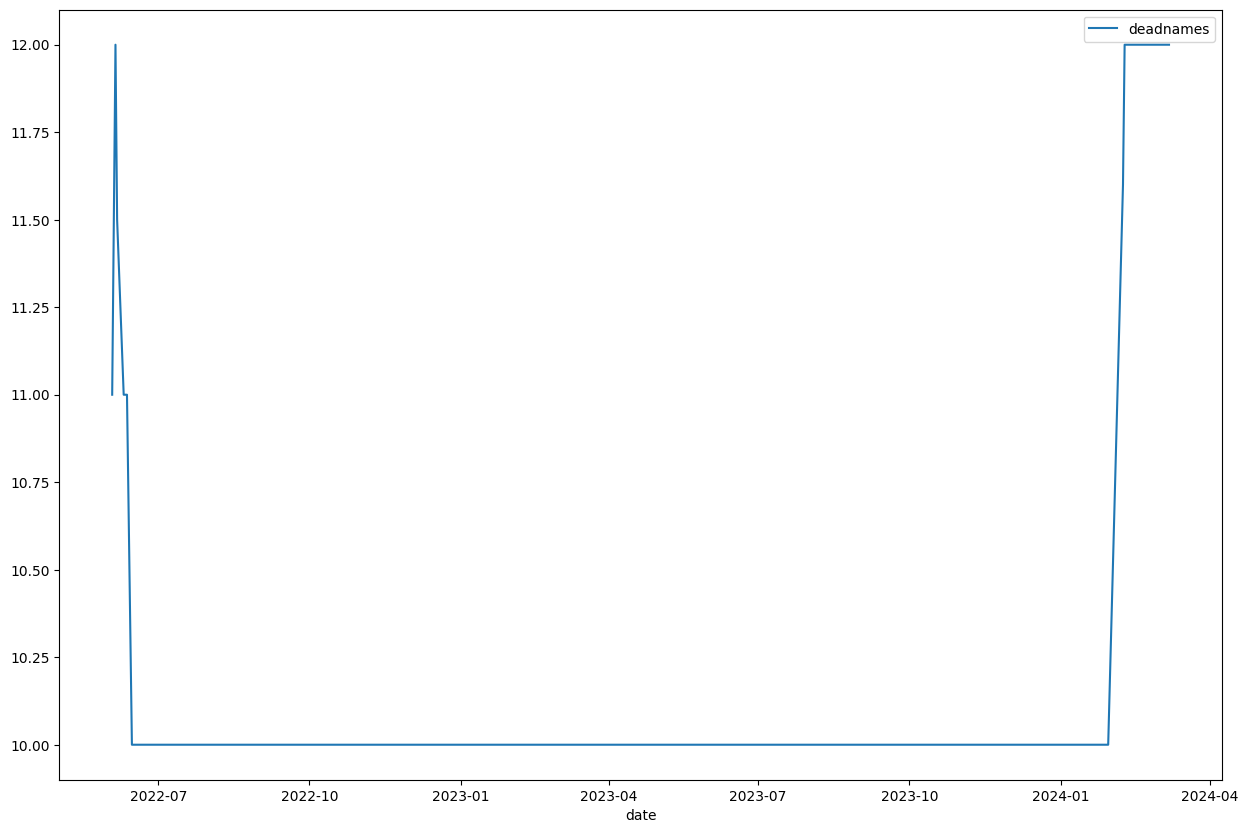

In [9]:
(
    revisions
    .assign(
        deadnames = lambda df: df['*'].apply(lambda x: str(x).lower().count(decode(dead_name).lower()))
    )
    #.reset_index()
    [['timestamp', 'deadnames']]
    .assign(
        date = lambda df: pd.to_datetime(df.timestamp).dt.date
    )
    .groupby('date')
    .agg({'deadnames': 'mean'})
    .plot
    .line(
        figsize=(15,10)
    )
)

In [10]:
def get_diff(revid):
    return page.get_diff(revid)

diffs = revisions.reset_index().revid.progress_apply(lambda x: page.extract_plusminus(get_diff(x))['added'] )

#diffs

  0%|          | 0/75 [00:00<?, ?it/s]

  3%|▎         | 2/75 [00:00<00:11,  6.13it/s]

  4%|▍         | 3/75 [00:00<00:16,  4.45it/s]

  5%|▌         | 4/75 [00:00<00:18,  3.89it/s]

  7%|▋         | 5/75 [00:01<00:19,  3.57it/s]

  8%|▊         | 6/75 [00:01<00:22,  3.02it/s]

  9%|▉         | 7/75 [00:02<00:22,  3.02it/s]

 11%|█         | 8/75 [00:02<00:21,  3.12it/s]

 12%|█▏        | 9/75 [00:02<00:20,  3.20it/s]

 13%|█▎        | 10/75 [00:02<00:20,  3.20it/s]

 15%|█▍        | 11/75 [00:03<00:19,  3.23it/s]

 16%|█▌        | 12/75 [00:03<00:19,  3.21it/s]

 17%|█▋        | 13/75 [00:03<00:19,  3.16it/s]

 19%|█▊        | 14/75 [00:04<00:18,  3.23it/s]

 20%|██        | 15/75 [00:04<00:18,  3.28it/s]

 21%|██▏       | 16/75 [00:04<00:17,  3.36it/s]

 23%|██▎       | 17/75 [00:05<00:19,  3.05it/s]

 24%|██▍       | 18/75 [00:05<00:20,  2.80it/s]

 25%|██▌       | 19/75 [00:05<00:19,  2.92it/s]

 27%|██▋       | 20/75 [00:06<00:18,  3.05it/s]

 28%|██▊       | 21/75 [00:06<00:17,  3.07it/s]

 29%|██▉       | 22/75 [00:06<00:16,  3.13it/s]

 31%|███       | 23/75 [00:07<00:16,  3.15it/s]

 32%|███▏      | 24/75 [00:07<00:16,  3.15it/s]

 33%|███▎      | 25/75 [00:07<00:15,  3.15it/s]

 35%|███▍      | 26/75 [00:08<00:16,  2.91it/s]

 36%|███▌      | 27/75 [00:08<00:16,  2.98it/s]

 37%|███▋      | 28/75 [00:08<00:15,  3.06it/s]

 39%|███▊      | 29/75 [00:09<00:15,  3.07it/s]

 40%|████      | 30/75 [00:09<00:14,  3.11it/s]

 41%|████▏     | 31/75 [00:09<00:13,  3.16it/s]

 43%|████▎     | 32/75 [00:10<00:13,  3.17it/s]

 44%|████▍     | 33/75 [00:10<00:13,  3.09it/s]

 45%|████▌     | 34/75 [00:10<00:13,  3.11it/s]

 47%|████▋     | 35/75 [00:11<00:14,  2.79it/s]

 48%|████▊     | 36/75 [00:11<00:14,  2.63it/s]

 49%|████▉     | 37/75 [00:12<00:15,  2.39it/s]

 51%|█████     | 38/75 [00:12<00:14,  2.56it/s]

 52%|█████▏    | 39/75 [00:12<00:13,  2.61it/s]

 53%|█████▎    | 40/75 [00:13<00:12,  2.77it/s]

 55%|█████▍    | 41/75 [00:13<00:11,  2.89it/s]

 56%|█████▌    | 42/75 [00:13<00:11,  2.97it/s]

 57%|█████▋    | 43/75 [00:14<00:10,  3.03it/s]

 59%|█████▊    | 44/75 [00:14<00:09,  3.12it/s]

 60%|██████    | 45/75 [00:14<00:09,  3.17it/s]

 61%|██████▏   | 46/75 [00:14<00:09,  3.19it/s]

 63%|██████▎   | 47/75 [00:15<00:09,  3.10it/s]

 64%|██████▍   | 48/75 [00:15<00:08,  3.12it/s]

 65%|██████▌   | 49/75 [00:16<00:09,  2.70it/s]

 67%|██████▋   | 50/75 [00:16<00:08,  2.85it/s]

 68%|██████▊   | 51/75 [00:16<00:08,  2.71it/s]

 69%|██████▉   | 52/75 [00:17<00:09,  2.43it/s]

 71%|███████   | 53/75 [00:17<00:08,  2.63it/s]

 72%|███████▏  | 54/75 [00:18<00:08,  2.37it/s]

 73%|███████▎  | 55/75 [00:18<00:07,  2.58it/s]

 75%|███████▍  | 56/75 [00:18<00:07,  2.38it/s]

 76%|███████▌  | 57/75 [00:19<00:07,  2.38it/s]

 77%|███████▋  | 58/75 [00:19<00:06,  2.53it/s]

 79%|███████▊  | 59/75 [00:20<00:05,  2.68it/s]

 80%|████████  | 60/75 [00:20<00:05,  2.86it/s]

 81%|████████▏ | 61/75 [00:20<00:04,  2.88it/s]

 83%|████████▎ | 62/75 [00:20<00:04,  3.00it/s]

 84%|████████▍ | 63/75 [00:21<00:04,  2.63it/s]

 85%|████████▌ | 64/75 [00:21<00:03,  2.81it/s]

 87%|████████▋ | 65/75 [00:22<00:03,  2.66it/s]

 88%|████████▊ | 66/75 [00:22<00:03,  2.78it/s]

 89%|████████▉ | 67/75 [00:22<00:02,  2.70it/s]

 91%|█████████ | 68/75 [00:23<00:02,  2.87it/s]

 92%|█████████▏| 69/75 [00:23<00:02,  2.99it/s]

 93%|█████████▎| 70/75 [00:23<00:01,  3.06it/s]

 95%|█████████▍| 71/75 [00:24<00:01,  2.84it/s]

 96%|█████████▌| 72/75 [00:24<00:01,  2.96it/s]

 97%|█████████▋| 73/75 [00:24<00:00,  2.77it/s]

 99%|█████████▊| 74/75 [00:25<00:00,  2.45it/s]

100%|██████████| 75/75 [00:25<00:00,  2.63it/s]

100%|██████████| 75/75 [00:26<00:00,  2.86it/s]

### depuis le coming out

In [11]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # on ne garde que les contributions après son coming out
    .pipe(lambda df: df.query(f'timestamp >= "{co_date}"') if co_date != None else df)
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
2A01:CB09:B069:C899:93E7:FDCE:FC91:45DA    1
JilanoB                                    1
Lucky Marie Wiki                           0
Taniki                                     0
Sété40                                     0
Skouratov                                  0
Sherwood6                                  0
Rell Canis                                 0
Python72                                   0
Pierregil83                                0
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [12]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

user
Evpok         0
Kvardek du    0
Python72      0
Sherwood6     0
Skouratov     0
Taniki        0
Name: deadname_count, dtype: int64

In [13]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-01-15"')
    .query('deadname_count > 0')
    [['user', 'deadname_count', 'timestamp']]
    .style
    .format_index(lambda x: format_revid_index(x, page_name))
)

,user,deadname_count,timestamp
revid,,,


## Discussions

In [14]:
talk = Page(f'Discussion:{page_name}', lang='fr')

In [15]:
talk_revisions = (
    pd
    .DataFrame
    .from_records(talk.get_revisions_list())
    .assign(
        diff = lambda df: df.revid.progress_apply(lambda x: talk.get_diff(x)),
        deleted = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['deleted']),
        added = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['added']),
    )
    .set_index('revid')
)

#talk_revisions

  0%|          | 0/67 [00:00<?, ?it/s]

  3%|▎         | 2/67 [00:00<00:11,  5.67it/s]

  4%|▍         | 3/67 [00:00<00:15,  4.03it/s]

  6%|▌         | 4/67 [00:01<00:19,  3.18it/s]

  7%|▋         | 5/67 [00:01<00:19,  3.23it/s]

  9%|▉         | 6/67 [00:01<00:19,  3.09it/s]

 10%|█         | 7/67 [00:02<00:20,  2.98it/s]

 12%|█▏        | 8/67 [00:02<00:19,  2.95it/s]

 13%|█▎        | 9/67 [00:02<00:19,  2.96it/s]

 15%|█▍        | 10/67 [00:03<00:19,  2.90it/s]

 16%|█▋        | 11/67 [00:03<00:19,  2.89it/s]

 18%|█▊        | 12/67 [00:03<00:18,  2.95it/s]

 19%|█▉        | 13/67 [00:04<00:18,  2.90it/s]

 21%|██        | 14/67 [00:04<00:18,  2.94it/s]

 22%|██▏       | 15/67 [00:04<00:17,  2.90it/s]

 24%|██▍       | 16/67 [00:05<00:17,  2.88it/s]

 25%|██▌       | 17/67 [00:05<00:17,  2.89it/s]

 27%|██▋       | 18/67 [00:05<00:16,  2.97it/s]

 28%|██▊       | 19/67 [00:06<00:16,  2.98it/s]

 30%|██▉       | 20/67 [00:06<00:15,  2.95it/s]

 31%|███▏      | 21/67 [00:06<00:15,  3.00it/s]

 33%|███▎      | 22/67 [00:07<00:15,  2.99it/s]

 34%|███▍      | 23/67 [00:07<00:14,  2.98it/s]

 36%|███▌      | 24/67 [00:07<00:14,  3.02it/s]

 37%|███▋      | 25/67 [00:08<00:13,  3.02it/s]

 39%|███▉      | 26/67 [00:08<00:13,  2.94it/s]

 40%|████      | 27/67 [00:08<00:13,  2.90it/s]

 42%|████▏     | 28/67 [00:09<00:13,  2.90it/s]

 43%|████▎     | 29/67 [00:09<00:13,  2.91it/s]

 45%|████▍     | 30/67 [00:09<00:12,  2.98it/s]

 46%|████▋     | 31/67 [00:10<00:12,  2.88it/s]

 48%|████▊     | 32/67 [00:10<00:12,  2.91it/s]

 49%|████▉     | 33/67 [00:11<00:11,  2.87it/s]

 51%|█████     | 34/67 [00:11<00:11,  2.81it/s]

 52%|█████▏    | 35/67 [00:11<00:11,  2.83it/s]

 54%|█████▎    | 36/67 [00:12<00:11,  2.63it/s]

 55%|█████▌    | 37/67 [00:12<00:10,  2.75it/s]

 57%|█████▋    | 38/67 [00:12<00:10,  2.85it/s]

 58%|█████▊    | 39/67 [00:13<00:09,  2.93it/s]

 60%|█████▉    | 40/67 [00:13<00:09,  2.95it/s]

 61%|██████    | 41/67 [00:13<00:08,  2.99it/s]

 63%|██████▎   | 42/67 [00:14<00:08,  2.97it/s]

 64%|██████▍   | 43/67 [00:14<00:08,  2.88it/s]

 66%|██████▌   | 44/67 [00:14<00:07,  2.91it/s]

 67%|██████▋   | 45/67 [00:15<00:07,  2.93it/s]

 69%|██████▊   | 46/67 [00:15<00:07,  2.99it/s]

 70%|███████   | 47/67 [00:15<00:06,  3.02it/s]

 72%|███████▏  | 48/67 [00:16<00:06,  3.08it/s]

 73%|███████▎  | 49/67 [00:16<00:06,  3.00it/s]

 75%|███████▍  | 50/67 [00:16<00:05,  3.04it/s]

 76%|███████▌  | 51/67 [00:17<00:05,  3.01it/s]

 78%|███████▊  | 52/67 [00:17<00:04,  3.00it/s]

 79%|███████▉  | 53/67 [00:17<00:04,  2.92it/s]

 81%|████████  | 54/67 [00:18<00:04,  2.62it/s]

 82%|████████▏ | 55/67 [00:18<00:04,  2.65it/s]

 84%|████████▎ | 56/67 [00:19<00:04,  2.64it/s]

 85%|████████▌ | 57/67 [00:19<00:03,  2.71it/s]

 87%|████████▋ | 58/67 [00:19<00:03,  2.84it/s]

 88%|████████▊ | 59/67 [00:20<00:02,  2.87it/s]

 90%|████████▉ | 60/67 [00:20<00:02,  2.93it/s]

 91%|█████████ | 61/67 [00:20<00:02,  2.91it/s]

 93%|█████████▎| 62/67 [00:21<00:01,  2.94it/s]

 94%|█████████▍| 63/67 [00:21<00:01,  3.01it/s]

 96%|█████████▌| 64/67 [00:21<00:01,  2.98it/s]

 97%|█████████▋| 65/67 [00:22<00:00,  2.95it/s]

 99%|█████████▊| 66/67 [00:22<00:00,  2.94it/s]

100%|██████████| 67/67 [00:22<00:00,  2.92it/s]

100%|██████████| 67/67 [00:23<00:00,  2.90it/s]

In [16]:
talk_revisions.to_csv(f'../data/page-diffs/discussion:{page_name.lower()}.csv')

### depuis le coming out

In [17]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # on ne garde que les contributions après son coming out
    #.query('timestamp >= "2013-08-22"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Abbd-44          0
Celinea33        0
Cymbella         0
Esprit Fugace    0
Eunostos         0
Florck           0
Framabot         0
JilanoB          0
Kvardek du       0
Léna             0
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [18]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Cymbella      0
Florck        0
Kvardek du    0
Sherwood6     0
Name: deadname_count, dtype: int64

In [19]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .query('deadname_count > 0')
    [['user', 'deadname_count', 'timestamp']]
    .style
    .format_index(lambda x : format_revid_index(x, f'Discussion:{page_name}'))
)

,user,deadname_count,timestamp
revid,,,


In [20]:
len(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .query('deadname_count > 0')
    [['user', 'deadname_count']]
)

0